In [21]:
pip install -U --user pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [135]:
import pandas_datareader.data as web
from pandas_datareader.data import Options
import itertools 
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.io import push_notebook, output_notebook
# select a palette
from bokeh.palettes import Dark2_5 as palette
import warnings
warnings.filterwarnings('ignore')


matplotlib.style.use('ggplot')
%matplotlib inline

output_notebook()

Loading BokehJS ...

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [136]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2021, 10, 10)

# Functions

In [3]:
def load_csv(fname, start=start, end=end):
    df = pd.read_csv(fname)
    df.Date=pd.to_datetime(df.Date)
    df=df.set_index('Date')
    df=df.loc[start:end]
    return df

def load_symbol(fname, start=start, end=end, source='yahoo'):
    start=str(start)[:10]
    end=str(end)[:10]
    df = web.DataReader(fname, source, start,end)
    return df

def plot_bokeh1(stocks, legends, column='Close'):
    p1 = figure(x_axis_type="datetime", title=column, plot_width=800)
    p1.grid.grid_line_alpha=0.3
    p1.xaxis.axis_label = 'Date'
    p1.yaxis.axis_label = column
    
    colors = itertools.cycle(palette)  
    
    for y, color,z in zip(stocks, colors, legends):
        p1.line(y.index, y[column], color=color,legend=z)
    
    p1.legend.location = "top_left"

    #output_file("stocks.html", title="stocks.py example")

    show(p1)  # open a browser

def plot_bokeh2(stocks, legends, stock, legend):
    p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
    p1.grid.grid_line_alpha=0.3
    p1.xaxis.axis_label = 'Date'
    p1.yaxis.axis_label = ' Close Price'
    
    colors = itertools.cycle(palette)  
    
    for y, color,z in zip(stocks, colors, legends):
        p1.line(y.index, y['Close'], color=color,legend=z)
    
    p1.legend.location = "top_left"

    aapl = np.array(stock['Close'])
    aapl_dates = np.array(stock.index, dtype=np.datetime64)

    window_size = 50
    window = np.ones(window_size)/float(window_size)
    aapl_avg = np.convolve(aapl, window, 'same')

    p2 = figure(x_axis_type="datetime", title="50 days Average")
    p2.grid.grid_line_alpha = 0
    p2.xaxis.axis_label = 'Date'
    p2.yaxis.axis_label = 'Price'
    p2.ygrid.band_fill_color = "olive"
    p2.ygrid.band_fill_alpha = 0.1

    p2.circle(aapl_dates, aapl, size=4, legend='close',
              color='darkgrey', alpha=0.2)

    p2.line(aapl_dates, aapl_avg, legend='avg', color='navy')
    p2.legend.location = "top_left"

    #output_file("stocks.html", title="stocks.py example")

    show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser

# Loading Data

In [139]:
vix=load_csv('^VIX .csv',start=start, end=end)
vix.columns=['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

In [140]:
del vix['Adj_Close']
del vix['Volume']

In [141]:
vix.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [144]:
spy=pd.read_csv('SPY .csv')
spy.Date=pd.to_datetime(spy.Date)
spy=spy.set_index('Date')

spy_change=spy.pct_change()
vix_change=vix.pct_change()

spy_abschange=abs(spy_change)
vix_abschange=abs(vix_change)

spy20mean=spy.rolling(12).mean()
spy50mean=spy.rolling(50).mean()
spy200mean=spy.rolling(200).mean()

In [145]:
spy.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [146]:
del spy['Adj Close']
del spy['Volume']

In [153]:
vix.head()

Open       High        Low      Close
Date                                                  
2000-01-03  24.360001  26.150000  23.980000  24.209999
2000-01-04  24.940001  27.180000  24.799999  27.010000
2000-01-05  27.980000  29.000000  25.850000  26.410000
2000-01-06  26.680000  26.709999  24.700001  25.730000
2000-01-07  25.139999  25.170000  21.719999  21.719999

In [150]:
spy = spy['2000-01-03':'2021-10-08']

In [154]:
spy.head()

Open       High         Low     Close
Date                                                  
2000-01-03  148.25000  148.25000  143.875000  145.4375
2000-01-04  143.53125  144.06250  139.640625  139.7500
2000-01-05  139.93750  141.53125  137.250000  140.0000
2000-01-06  139.62500  141.50000  137.750000  137.7500
2000-01-07  140.31250  145.75000  140.062500  145.7500

# VOLATILITY DISPERSION METHODOLOGY

In [155]:
vix_20std=vix.rolling(20).std()[19:]

stocks=[vix_20std,vix]
legends=['20-day standard deviation','VIX']

plot_bokeh1(stocks, legends)

In [156]:
vix_20max_return=vix.rolling(20).max().shift(-19)/vix-1.0
vix_20max_return=vix_20max_return[:-19]

In [157]:
df=pd.merge(vix_20std.reset_index(),vix_20max_return.reset_index(), on='Date')

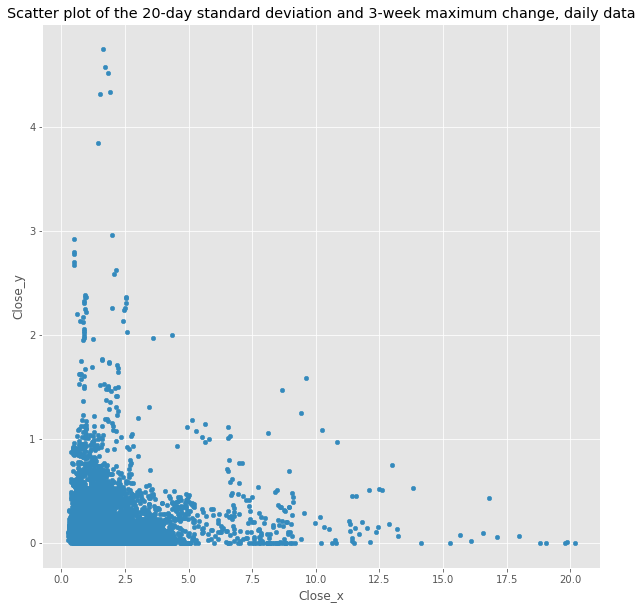

In [158]:
df.plot(kind='scatter',x='Close_x',y='Close_y',\
        title='Scatter plot of the 20-day standard deviation and 3-week maximum change, daily data',figsize=(10,10))
plt.show()

In [159]:
vix_20std_10min=vix_20std.rolling(10).min()
vix_20std_10min=vix_20std_10min.shift(1)
vix_20std_10min=vix_20std_10min[10:]

In [160]:
df_signal=pd.merge(vix_20std_10min.reset_index(),vix_20std.reset_index(),on='Date')

In [161]:
signal_date=df_signal[(df_signal.Close_x > 0.86) & (df_signal.Close_y < 0.86)].Date.tolist()

In [162]:
signal_vix=vix.loc[signal_date]

In [163]:
vix_5max_change=vix.rolling(5).max().shift(-4)/vix-1.0

In [164]:
vix_5max_change=vix_5max_change.shift(4)

In [165]:
signal_30=vix_5max_change[vix_5max_change.Close > 0.30].index.tolist()
signal_sell=vix.loc[signal_30]

In [166]:
vix[vix.index==vix[vix.index>=debut].index[0]]['Close'][0]

13.37

In [190]:
# Obtention des minimum entre signal achat et vente
idxmin_=[]
min_=[]
FIN_date=[]
FIN_value=[]
DEBUT = signal_vix.index[0:-1]

for debut in DEBUT:
    for day in vix[vix.index>=debut].index:
        if vix[vix.index==day]['Close'][0]>vix[vix.index==debut]['Close'][0]+5.0:
            FIN_date+=[day]
            FIN_value+=[vix[vix.index==day]['Close'][0]]
            break

#for debut, fin in zip(DEBUT, FIN):
#    idxmin_+=[vix[debut:fin]['Low'].idxmin()]
#    min_+=[vix[debut:fin]['Low'].min()]

In [191]:
# Obtention des minimum entre signal achat et vente
idxmin_=[]
min_=[]
DEBUT = signal_vix.index[0:-1]

for debut, fin in zip(DEBUT, FIN_date):
    idxmin_+=[vix[debut:fin]['Low'].idxmin()]
    min_+=[vix[debut:fin]['Low'].min()]

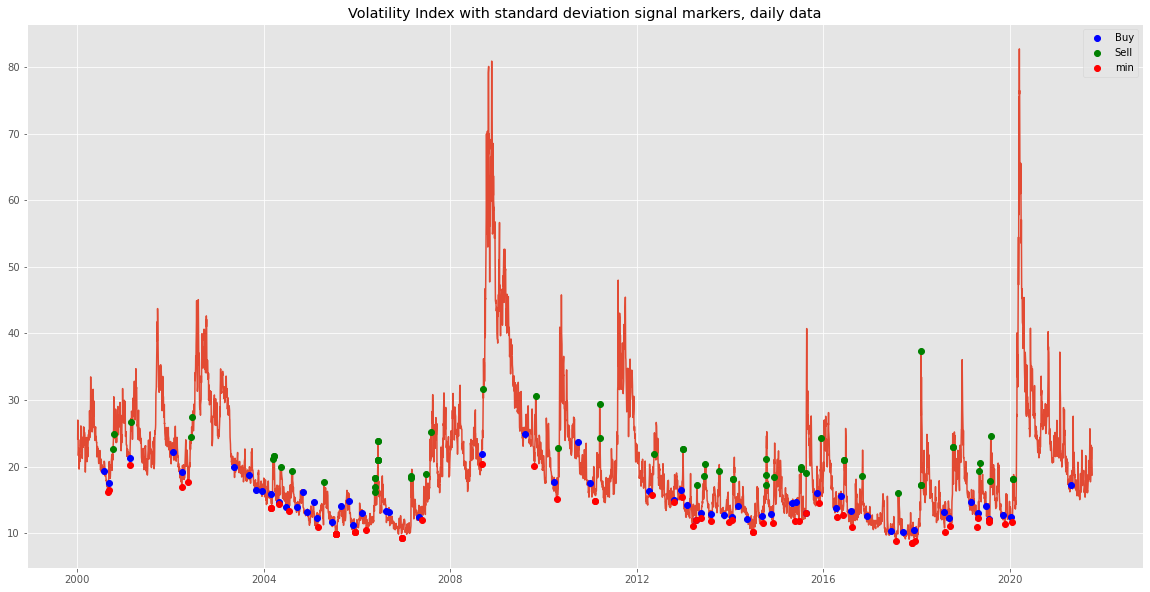

In [192]:
plt.figure(figsize=[20,10])
plt.title('Volatility Index with standard deviation signal markers, daily data')
#plt.plot(spy['Close'])
#plt.plot(spy['Volume']/10000000.0)
plt.plot(vix['Close'])
plt.plot(signal_vix['Close'],'bo',label='Buy')
plt.plot(FIN_date, FIN_value,'go',label='Sell')
plt.plot(idxmin_, min_, 'ro', label='min')
plt.legend(loc=1)
plt.show()
#plt.plot(spy['Volume']/10000000.0)

In [193]:
len(list(signal_vix['Close']))

63

In [196]:
len(FIN_value)

62

In [206]:
len(min_)

62

In [212]:
PAY = []
for i in range(62):
    if signal_vix['Close'][i]-min_[i]<10.0:
        PAY+=[(FIN_value[i]-signal_vix['Close'][i])*200]
    else:
        PAY+=[-10.0*200]

hausse=0
pay_hausse=0
pay_baisse=0
baisse=0
for val in PAY:
    if val>0:
        hausse+=1
        pay_hausse+=val
    else:
        baisse+=1
        pay_baisse+=val
print(hausse/(hausse+baisse))
print((pay_hausse/hausse)/(-pay_baisse/baisse))

0.9838709677419355
0.6409344


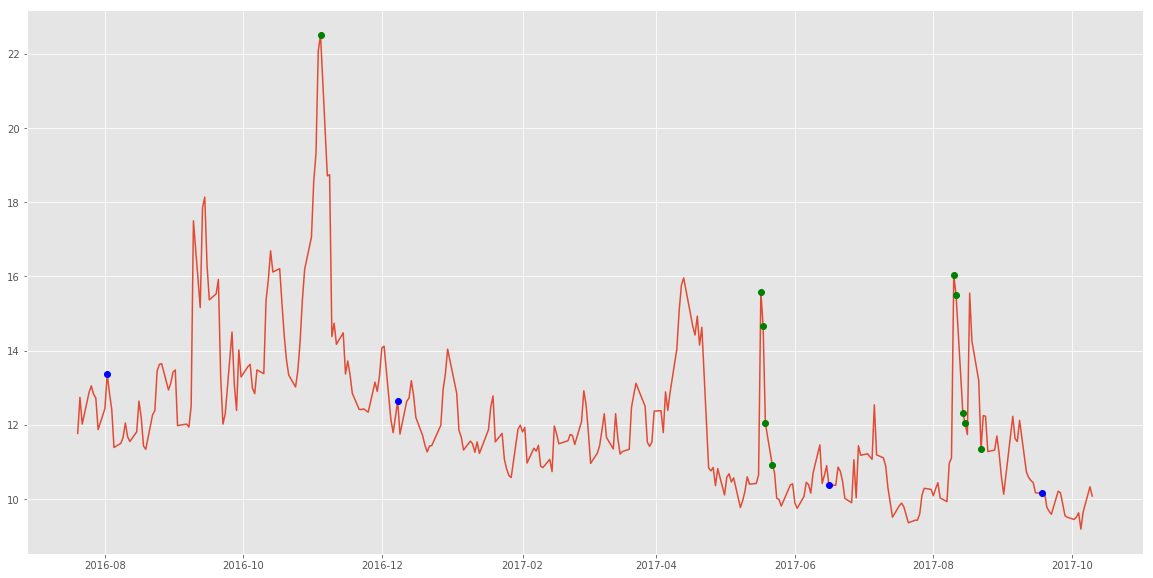

In [47]:
plt.figure(figsize=[20,10])
#plt.plot(spy['Close'])
#plt.plot(spy['Volume']/10000000.0)
plt.plot(vix.ix[-310:]['Close'])
plt.plot(signal_vix.ix[-4:]['Close'],'bo')
plt.plot(signal_sell.ix[-10:]['Close'],'go')
plt.show()
#plt.plot(spy['Volume']/10000000.0)

# Using VVIX

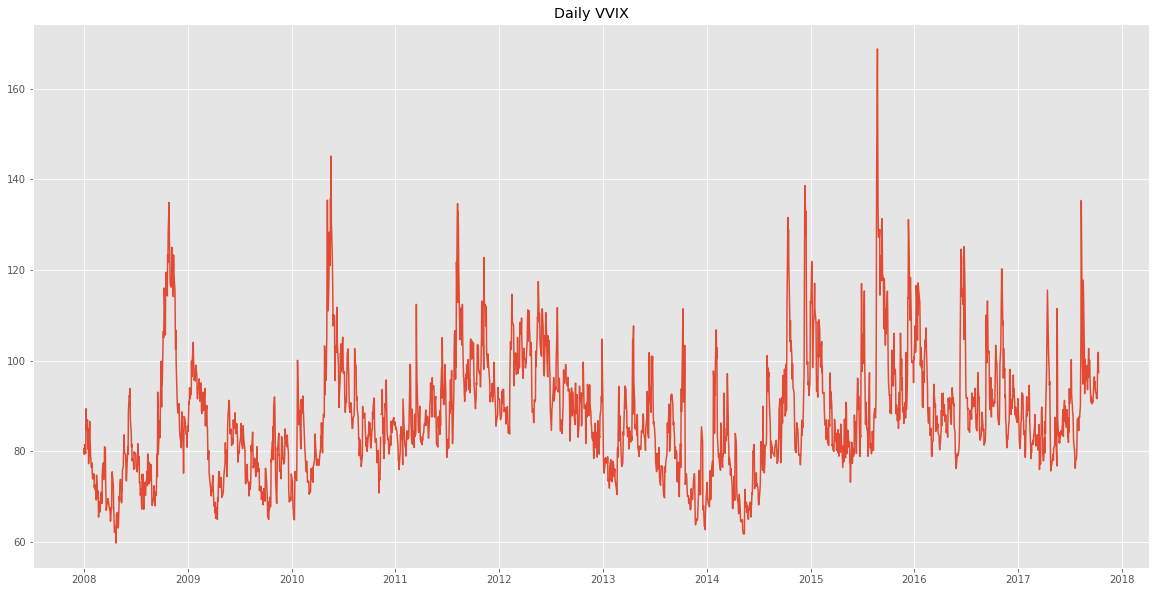

In [48]:
plt.figure(figsize=[20,10])
plt.title('Daily VVIX')
plt.plot(vvix['Close'])
plt.show()
#plt.plot(signal_vix.ix[-4:]['Close'],'bo')
#plt.plot(signal_sell.ix[-10:]['Close'],'go')
#plt.plot(spy['Volume']/10000000.0)

In [49]:
vvix_20std=pd.rolling_std(vvix, window=20).ix[19:]

print(vvix_20std.quantile(.15))

Close    3.184134
Name: 0.15, dtype: float64


In [50]:
stocks=[vvix_20std,vvix]
legends=['20-day standard deviation for VVIX','VVIX']

plot_bokeh1(stocks, legends)

In [51]:
vix_20std.quantile(.15)

Open     0.820536
High     0.958822
Low      0.692947
Close    0.841777
Name: 0.15, dtype: float64

In [52]:
vvix_20std.quantile(.15)

Close    3.184134
Name: 0.15, dtype: float64

In [53]:
vvix_20max_return=pd.rolling_max(vvix,20).shift(-19)/vix-1.0
vvix_20max_return=vvix_20max_return[:-19]

vvix_20std_10min=pd.rolling_min(vvix_20std,10)
vvix_20std_10min=vvix_20std_10min.shift(1)
vvix_20std_10min=vvix_20std_10min.ix[10:]

df_signal_vvix=pd.merge(vvix_20std_10min.reset_index(),vvix_20std.reset_index(),on='Date')


In [54]:
signal_date_vvix=df_signal_vvix[(df_signal_vvix.Close_x > 3.16) & (df_signal_vvix.Close_y < 3.16)].Date.tolist()
signal_vvix=vix.ix[signal_date_vvix]

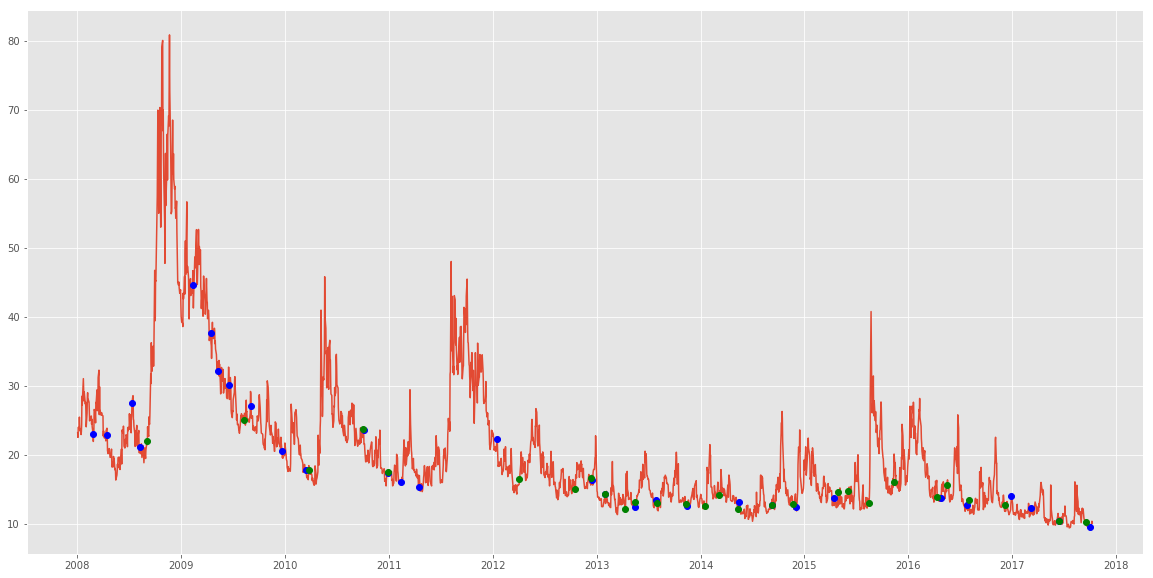

In [55]:
plt.figure(figsize=[20,10])
#plt.plot(spy['Close'])
#plt.plot(spy['Volume']/10000000.0)
plt.plot(vix['Close'])
plt.plot(signal_vvix['Close'],'bo')
plt.plot(signal_vix['Close'],'go')
#plt.plot(signal_sell['Close'],'go')
#plt.plot(spy['Volume']/10000000.0)
plt.show()

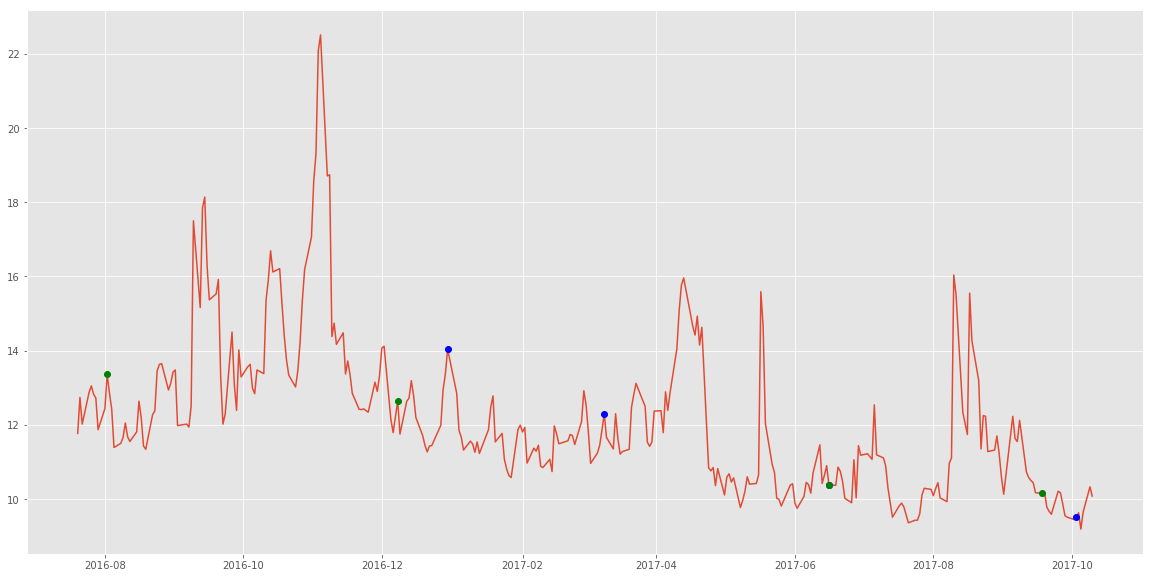

In [56]:
plt.figure(figsize=[20,10])
#plt.plot(spy['Close'])
#plt.plot(spy['Volume']/10000000.0)
plt.plot(vix.ix[-310:]['Close'])

plt.plot(signal_vvix.ix[-4:]['Close'],'bo')
plt.plot(signal_vix.ix[-4:]['Close'],'go')
plt.show()
#plt.plot(signal_sell.ix[-10:]['Close'],'go')
#plt.plot(spy['Volume']/10000000.0)

# Conclusion